# Week 9 Progress Report

Questions to answer with data:

- By week: tweets from Argentina vs not Argentina
- If someone was out of the country, when?
- Residents (weekly, monthly), assume residents in argentina unless stated otherwise
- Relabel people so if they tweet once a month in Argentina, they are a resident
- Someone's last tweet in Argentina, get rid of all the others
- Plot serotypes

## Cleaning Data

- (*done*) Remove duplicates (keep resident status)
- (*done*) Keep only necessary columns (date, username, lang, user_location, place_full_name, place_name, place_country, place_country_code, place_type, coordinates_longitude, coordinates_latitude)
- (*done*) Label tweets in/out of Argentina
- (*done*) Extract epidemiological weeks & months
- **If someone tweeted once a month from Argentina, they get resident status**
- (*done*) If someone's last tweet was out of Argentina, remove the following tweets

In [176]:
import pandas as pd

raw_df = pd.read_feather("../data/df_2016_coordinates.feather")

In [177]:
# removing duplicates

df = raw_df[["DateTime", "username", "tweet_content", "tweet", "lang", "user_location", "place_full_name", "place_name", "place_country", "place_country_code", "place_type", "coordinates_longitude", "coordinates_latitude", "resident/visitor"]]

df.drop_duplicates(inplace=True, subset=["username", "tweet_content"], keep='last')

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
usernames = df.username.unique()
len(usernames)

5576

In [179]:
# at least one tweet was done in Argentina by username

import tqdm

df_new = []
for username in tqdm.tqdm(usernames):
    user_df = df[df.username == username].reset_index(drop=True)
    tag = False
    for i in range(user_df.shape[0]):
        if user_df.place_country_code[i] == 'AR':
            tag = True
    if tag == True:
        df_new.append(user_df)



  0%|          | 0/5576 [00:00<?, ?it/s]

  0%|          | 1/5576 [00:00<10:12,  9.11it/s]

  0%|          | 2/5576 [00:00<10:13,  9.09it/s]

  0%|          | 3/5576 [00:00<10:12,  9.11it/s]

  0%|          | 4/5576 [00:00<10:10,  9.13it/s]

  0%|          | 5/5576 [00:00<10:09,  9.14it/s]

  0%|          | 6/5576 [00:00<10:09,  9.13it/s]

  0%|          | 7/5576 [00:00<10:09,  9.13it/s]

  0%|          | 8/5576 [00:00<10:08,  9.15it/s]

  0%|          | 9/5576 [00:00<10:08,  9.14it/s]

  0%|          | 10/5576 [00:01<10:11,  9.10it/s]

  0%|          | 11/5576 [00:01<10:14,  9.05it/s]

  0%|          | 12/5576 [00:01<10:13,  9.07it/s]

  0%|          | 13/5576 [00:01<10:11,  9.10it/s]

  0%|          | 14/5576 [00:01<10:11,  9.10it/s]

  0%|          | 15/5576 [00:01<10:09,  9.12it/s]

  0%|          | 16/5576 [00:01<10:08,  9.13it/s]

  0%|          | 17/5576 [00:01<10:07,  9.14it/s]

  0%|          | 18/5576 [00:01<10:08,  9.13it/s]

  0%|          | 19/5576 [00:02<10:07,  9.14it/

In [94]:
len(df_new)

238

In [180]:
# combine these into df

df = pd.concat(df_new, ignore_index = True)
df

,DateTime,username,tweet_content,tweet,lang,user_location,place_full_name,place_name,place_country,place_country_code,place_type,coordinates_longitude,coordinates_latitude,resident/visitor
0,2016-10-30 05:56:13,martin10p,I'm at Antik Restaurant + Bar - @antikcr in Sa...,i'm at antik restaurant + bar - antikcr in san...,ht,"Cartago, Costa Rica","San Jose, Costa Rica",San Jose,Costa Rica,CR,city,-84.06959295,9.92926478,visitor
1,2016-10-23 05:03:06,martin10p,I'm at La Nave in Cartago w/ @alejandra188888 ...,i'm at la nave in cartago w/ alejandra188888,en,"Cartago, Costa Rica","Cartago, Costa Rica",Cartago,Costa Rica,CR,city,-83.91707533,9.85981633,visitor
2,2016-10-22 06:22:30,martin10p,I'm at La Concha de La Lora in Barrio La Calif...,i'm at la concha de la lora in barrio la calif...,ca,"Cartago, Costa Rica","San Jose, Costa Rica",San Jose,Costa Rica,CR,city,-84.06913946,9.93352328,visitor
3,2016-10-22 06:22:07,martin10p,I'm at Barrio La California in San José https:...,i'm at barrio la california in san jos,ca,"Cartago, Costa Rica","San Jose, Costa Rica",San Jose,Costa Rica,CR,city,-84.06921169,9.9328762,visitor
4,2016-10-18 15:59:11,martin10p,"I'm at Universidad Fidélitas in San Pedro, San...","i'm at universidad fidlitas in san pedro, san ...",es,"Cartago, Costa Rica","San José, Costa Rica",San José,Costa Rica,CR,admin,-84.03493881,9.93296361,visitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289896,2016-01-10 08:13:22,Lautisiman,Re manija estoy,re manija estoy,es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident
289897,2016-01-10 08:06:14,Lautisiman,@OriiMarmolejo estuvo piola igual jajaj,oriimarmolejo estuvo piola igual jajaj,es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident
289898,2016-01-10 08:05:26,Lautisiman,"@OriiMarmolejo uhhhh, no se nos empezaron a sa...","oriimarmolejo uhhhh, no se nos empezaron a sa...",es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident
289899,2016-01-10 08:02:30,Lautisiman,Re curado igual,re curado igual,es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident


In [183]:
start_date = pd.Timestamp(year=2015, month=10, day=1, hour=0, minute=0, second=0)
end_date = pd.Timestamp(year=2015, month=10, day=1, hour=1, minute=0, second=0)

In [185]:
df[(df['DateTime'] > start_date) & (df['DateTime'] <= end_date)]

,DateTime,username,tweet_content,tweet,lang,user_location,place_full_name,place_name,place_country,place_country_code,place_type,coordinates_longitude,coordinates_latitude,resident/visitor
549,2015-10-01 00:20:31,martin10p,I'm at Estación de buses la Pithaya Cocorí/Lou...,i'm at estacin de buses la pithaya cocor/lourdes,es,"Cartago, Costa Rica","Cartago, Costa Rica",Cartago,Costa Rica,CR,city,-83.92246452,9.86256001,visitor
1500,2015-10-01 00:55:27,lgloria27,@NC_once @FioAlvarado Increíble que éstas cifr...,nc_once fioalvarado increble que stas cifras ...,es,"San Jose, Costa Rica","San José, Costa Rica",San José,Costa Rica,CR,admin,-84.5919495,9.0655537,visitor
1501,2015-10-01 00:54:39,lgloria27,@vaneloaizaCR @saintloyal @wef muchas...ahora ...,vaneloaizacr saintloyal wef muchas...ahora ha...,es,"San Jose, Costa Rica","San José, Costa Rica",San José,Costa Rica,CR,admin,-84.5919495,9.0655537,visitor
18920,2015-10-01 00:59:17,improtour,Terapia de pareja. \n#smallpeople #love #terap...,terapia de pareja. smallpeople love terapia pu...,es,across the universe,"San Juan, Puerto Rico",San Juan,United States,US,city,-66.1,18.45,visitor
18921,2015-10-01 00:56:55,improtour,"Coco. \n#smallpeople @ San Juan, Puerto Rico h...","coco. smallpeople san juan, puerto rico",es,across the universe,"San Juan, Puerto Rico",San Juan,United States,US,city,-66.0667,18.45,visitor
47968,2015-10-01 00:56:05,maualva21,"💪🏽😩💥 (@ CrossFit Rohrmoser in Rohrmoser, San J...","( crossfit rohrmoser in rohrmoser, san jose)",de,Costa Rica,"San José, Costa Rica",San José,Costa Rica,CR,admin,-84.12648261,9.95397214,visitor
52089,2015-10-01 00:48:09,jorditifner,A pesar de todo te quiero tanto💕 @ Sheraton Co...,a pesar de todo te quiero tanto sheraton cordo...,es,,"Córdoba, Argentina",Córdoba,Argentina,AR,city,-64.2023087,-31.4138355,visitor
57752,2015-10-01 00:53:05,WorkatHilton,Join the Hilton UK team! See our latest #Hospi...,join the hilton uk team! see our latest hospit...,en,,"Bournemouth, England",Bournemouth,United Kingdom,GB,city,-1.880769,50.719164,visitor
57753,2015-10-01 00:44:52,WorkatHilton,If you're a #Hospitality professional in #Salt...,if you're a hospitality professional in saltla...,en,,"Salt Lake City, UT",Salt Lake City,United States,US,city,-111.8985922,40.7563925,visitor
57754,2015-10-01 00:37:20,WorkatHilton,"See our latest #Kenner, LA #job and click to a...","see our latest kenner, la job and click to app...",en,,"Kenner, LA",Kenner,United States,US,city,-90.2526163,29.9853746,visitor


In [111]:
# label tweets in/out argentina, convert DateTime to epidemiological week and month

import numpy as np

df["in/out"] = np.where(df["place_country_code"] == 'AR', "in", "out")
df["epi_week"] = df['DateTime'].apply(lambda x: Week.fromdate(x))
df["month"] = df["DateTime"].dt.strftime("%b-%Y")
df

,DateTime,username,tweet_content,tweet,lang,user_location,place_full_name,place_name,place_country,place_country_code,place_type,coordinates_longitude,coordinates_latitude,resident/visitor,in/out,epi_week,month
0,2016-10-30 05:56:13,martin10p,I'm at Antik Restaurant + Bar - @antikcr in Sa...,i'm at antik restaurant + bar - antikcr in san...,ht,"Cartago, Costa Rica","San Jose, Costa Rica",San Jose,Costa Rica,CR,city,-84.06959295,9.92926478,visitor,out,201644,Oct-2016
1,2016-10-23 05:03:06,martin10p,I'm at La Nave in Cartago w/ @alejandra188888 ...,i'm at la nave in cartago w/ alejandra188888,en,"Cartago, Costa Rica","Cartago, Costa Rica",Cartago,Costa Rica,CR,city,-83.91707533,9.85981633,visitor,out,201643,Oct-2016
2,2016-10-22 06:22:30,martin10p,I'm at La Concha de La Lora in Barrio La Calif...,i'm at la concha de la lora in barrio la calif...,ca,"Cartago, Costa Rica","San Jose, Costa Rica",San Jose,Costa Rica,CR,city,-84.06913946,9.93352328,visitor,out,201642,Oct-2016
3,2016-10-22 06:22:07,martin10p,I'm at Barrio La California in San José https:...,i'm at barrio la california in san jos,ca,"Cartago, Costa Rica","San Jose, Costa Rica",San Jose,Costa Rica,CR,city,-84.06921169,9.9328762,visitor,out,201642,Oct-2016
4,2016-10-18 15:59:11,martin10p,"I'm at Universidad Fidélitas in San Pedro, San...","i'm at universidad fidlitas in san pedro, san ...",es,"Cartago, Costa Rica","San José, Costa Rica",San José,Costa Rica,CR,admin,-84.03493881,9.93296361,visitor,out,201642,Oct-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289896,2016-01-10 08:13:22,Lautisiman,Re manija estoy,re manija estoy,es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident,in,201602,Jan-2016
289897,2016-01-10 08:06:14,Lautisiman,@OriiMarmolejo estuvo piola igual jajaj,oriimarmolejo estuvo piola igual jajaj,es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident,in,201602,Jan-2016
289898,2016-01-10 08:05:26,Lautisiman,"@OriiMarmolejo uhhhh, no se nos empezaron a sa...","oriimarmolejo uhhhh, no se nos empezaron a sa...",es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident,in,201602,Jan-2016
289899,2016-01-10 08:02:30,Lautisiman,Re curado igual,re curado igual,es,"Mendoza, Argentina","Godoy Cruz, Argentina",Godoy Cruz,Argentina,AR,city,-68.89559,-32.9602539,resident,in,201602,Jan-2016


In [112]:
df['in/out'].value_counts()

out    262686
in      27215
Name: in/out, dtype: int64

In [113]:
usernames = df.username.unique()
len(usernames)

238

In [114]:
# at least one tweet was done in Argentina by username

import tqdm

df_after = []
for username in tqdm.tqdm(usernames):
    user_df = df[df.username == username].reset_index(drop=True).sort_values(by=["DateTime"])
    index = 0
    for i in range(user_df.shape[0]):
        if user_df["in/out"][i] == 'in':
            index = i + 1
    user_df = user_df[0:index]
    df_after.append(user_df)



  0%|          | 0/238 [00:00<?, ?it/s]

  0%|          | 1/238 [00:00<00:36,  6.46it/s]

  3%|▎         | 6/238 [00:00<00:27,  8.39it/s]

  5%|▌         | 12/238 [00:00<00:21, 10.47it/s]

  8%|▊         | 18/238 [00:00<00:15, 13.84it/s]

 10%|█         | 24/238 [00:00<00:11, 17.89it/s]

 13%|█▎        | 30/238 [00:00<00:09, 22.26it/s]

 15%|█▍        | 35/238 [00:01<00:07, 25.89it/s]

 17%|█▋        | 41/238 [00:01<00:06, 30.79it/s]

 19%|█▉        | 46/238 [00:01<00:08, 21.88it/s]

 21%|██▏       | 51/238 [00:01<00:07, 25.75it/s]

 24%|██▍       | 57/238 [00:01<00:05, 30.53it/s]

 26%|██▋       | 63/238 [00:01<00:04, 35.36it/s]

 29%|██▉       | 69/238 [00:01<00:04, 39.82it/s]

 32%|███▏      | 75/238 [00:02<00:03, 42.96it/s]

 34%|███▍      | 81/238 [00:02<00:03, 44.81it/s]

 37%|███▋      | 87/238 [00:02<00:05, 26.45it/s]

 38%|███▊      | 91/238 [00:02<00:07, 18.85it/s]

 41%|████      | 97/238 [00:03<00:05, 23.64it/s]

 43%|████▎     | 103/238 [00:03<00:04, 28.84it/s]

 46%|███

In [115]:
df_after = pd.concat(df_after, ignore_index=True)
df_after

,DateTime,username,tweet_content,tweet,lang,user_location,place_full_name,place_name,place_country,place_country_code,place_type,coordinates_longitude,coordinates_latitude,resident/visitor,in/out,epi_week,month
0,2015-10-01 00:20:31,martin10p,I'm at Estación de buses la Pithaya Cocorí/Lou...,i'm at estacin de buses la pithaya cocor/lourdes,es,"Cartago, Costa Rica","Cartago, Costa Rica",Cartago,Costa Rica,CR,city,-83.92246452,9.86256001,visitor,out,201539,Oct-2015
1,2015-10-01 19:38:09,martin10p,❄☔⚡☁💕 (@ Universidad de Costa Rica - @universi...,( universidad de costa rica - universidaducr ...,es,"Cartago, Costa Rica","San José, Costa Rica",San José,Costa Rica,CR,admin,-84.05073166,9.93765577,visitor,out,201539,Oct-2015
2,2015-10-02 01:22:11,martin10p,😌✌ (@ Autopista Florencio Del Castillo in Tres...,( autopista florencio del castillo in tres ro...,es,"Cartago, Costa Rica","Cartago, Costa Rica",Cartago,Costa Rica,CR,admin,-83.99331093,9.9011312,visitor,out,201539,Oct-2015
3,2015-10-02 06:58:32,martin10p,"I'm at Martin""s House in Cartago https://t.co/...","i'm at martin""s house in cartago",en,"Cartago, Costa Rica","Cartago, Costa Rica",Cartago,Costa Rica,CR,admin,-83.90559972,9.83028434,visitor,out,201539,Oct-2015
4,2015-10-02 23:15:37,martin10p,✨💤 (@ INTER GYM 2) https://t.co/Q9SiFMIr0Q,( inter gym 2),sv,"Cartago, Costa Rica","Cartago, Costa Rica",Cartago,Costa Rica,CR,admin,-83.91025281,9.8325929,visitor,out,201539,Oct-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244890,2016-07-19 06:28:15,Lautisiman,No me meto con casadas tarara tarara https://t...,no me meto con casadas tarara tarara,es,"Mendoza, Argentina","Luján de Cuyo, Argentina",Luján de Cuyo,Argentina,AR,city,-68.9405057,-33.043799,resident,in,201629,Jul-2016
244891,2016-07-19 06:28:55,Lautisiman,T atrevido tarara tarara https://t.co/pJoCcOUBgc,t atrevido tarara tarara,pt,"Mendoza, Argentina","Luján de Cuyo, Argentina",Luján de Cuyo,Argentina,AR,city,-68.9405057,-33.043799,resident,in,201629,Jul-2016
244892,2016-07-19 06:33:42,Lautisiman,Quien yt hago el aguante tarara tarara https:/...,quien yt hago el aguante tarara tarara,es,"Mendoza, Argentina","Luján de Cuyo, Argentina",Luján de Cuyo,Argentina,AR,city,-68.9405057,-33.043799,resident,in,201629,Jul-2016
244893,2016-08-24 23:53:35,Lautisiman,Nunca me voy a olvidar de este viaje🔙🔙🔙 @ Esta...,nunca me voy a olvidar de este viaje estadio g...,es,"Mendoza, Argentina","Rosario, Argentina",Rosario,Argentina,AR,city,-60.674567,-32.913997,resident,in,201634,Aug-2016


In [128]:
df.columns

Index(['DateTime', 'username', 'tweet_content', 'tweet', 'lang',
       'user_location', 'place_full_name', 'place_name', 'place_country',
       'place_country_code', 'place_type', 'coordinates_longitude',
       'coordinates_latitude', 'resident/visitor', 'in/out', 'epi_week',
       'month'],
      dtype='object')

### How many residents vs visitors?

Number of tweets by residents vs visitors

In [129]:
df["resident/visitor"].value_counts()

visitor     278594
resident     11307
Name: resident/visitor, dtype: int64

Number of users - residents vs visitors

In [137]:
df0 = df.drop_duplicates(subset="username")
df0["resident/visitor"].value_counts()

visitor     182
resident     56
Name: resident/visitor, dtype: int64

In [159]:
df.tweet

0         i'm at antik restaurant + bar - antikcr in san...
1             i'm at la nave in cartago w/ alejandra188888 
2         i'm at la concha de la lora in barrio la calif...
3                   i'm at barrio la california in san jos 
4         i'm at universidad fidlitas in san pedro, san ...
                                ...                        
289896                                      re manija estoy
289897               oriimarmolejo estuvo piola igual jajaj
289898     oriimarmolejo uhhhh, no se nos empezaron a sa...
289899                                      re curado igual
289900                                     linda gira igual
Name: tweet, Length: 289901, dtype: object

### Users Tweets In/Out of Argentina

In [116]:
df1 = df[["epi_week", "in/out"]].sort_values(by="epi_week")
df1 = df1.value_counts(dropna=False)
df1 = df1.reset_index().rename({0: "Value"}, axis=1)
df1 = df1.sort_values(by="epi_week")
df1

,epi_week,in/out,Value
40,201539,out,2884
110,201539,in,210
1,201540,out,7562
85,201540,in,460
99,201541,in,337
...,...,...,...
42,201642,out,2796
106,201643,in,256
47,201643,out,2659
67,201644,out,647


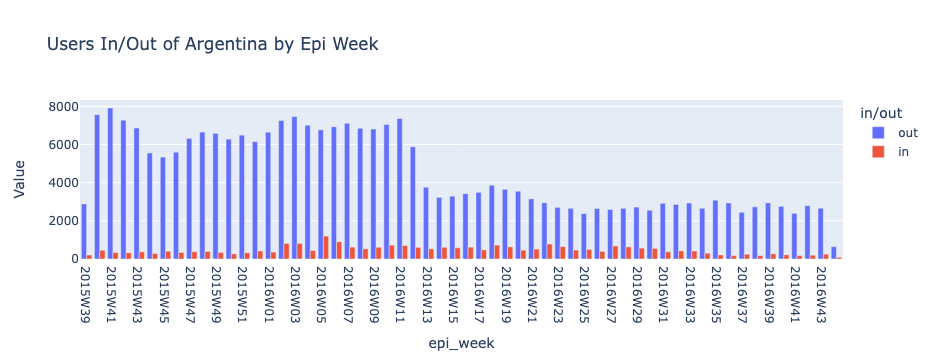

In [117]:
import plotly.express as px

fig = px.bar(df1, x="epi_week", y="Value", color="in/out", title="Users In/Out of Argentina by Epi Week", barmode="group", width=1500)
fig.show()

In [118]:
df2 = df[["month", "in/out"]].sort_values(by="month")
df2 = df2.value_counts(dropna=False)
df2 = df2.reset_index().rename({0: "Value"}, axis=1)
df2 = df2.sort_values(by="month")
df2

,month,in/out,Value
7,Apr-2016,out,14365
18,Apr-2016,in,2448
8,Aug-2016,out,12897
21,Aug-2016,in,1570
3,Dec-2015,out,28485
22,Dec-2015,in,1547
2,Feb-2016,out,28623
13,Feb-2016,in,3451
1,Jan-2016,out,31156
16,Jan-2016,in,2634


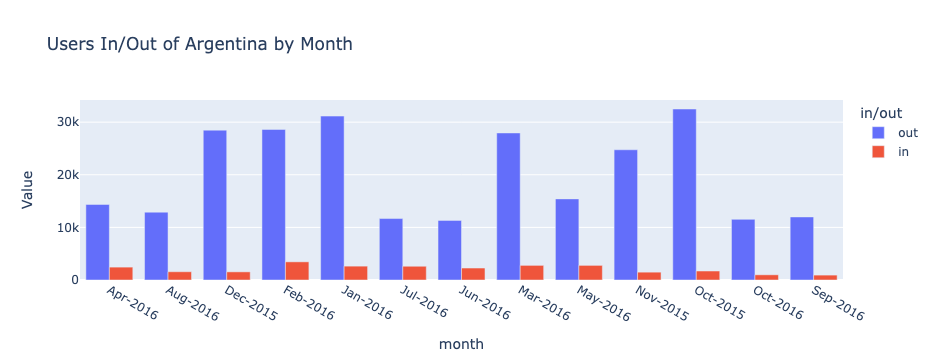

In [119]:
import plotly.express as px

fig = px.bar(df2, x="month", y="Value", color="in/out", title="Users In/Out of Argentina by Month", barmode="group")
fig.show()

### Residents In/Out of Argentina

In [120]:
# now viewing where the users were RESIDENTS ONLY by epi week

df3 = df[df['resident/visitor'] == "resident"]

df3 = df3[["epi_week", "in/out"]].sort_values(by="epi_week")
df3 = df3.value_counts(dropna=False)
df3 = df3.reset_index().rename({0: "Value"}, axis=1)
df3 = df3.sort_values(by="epi_week")
df3

,epi_week,in/out,Value
109,201539,out,2
70,201539,in,31
28,201540,in,124
77,201540,out,23
16,201541,in,187
...,...,...,...
83,201642,out,17
97,201643,out,9
44,201643,in,85
60,201644,in,48


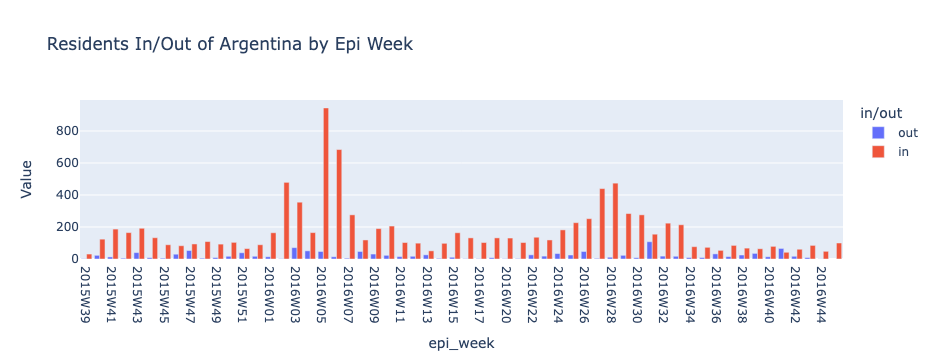

In [121]:
import plotly.express as px

fig = px.bar(df3, x="epi_week", y="Value", color="in/out", title="Residents In/Out of Argentina by Epi Week", barmode="group")
fig.show()

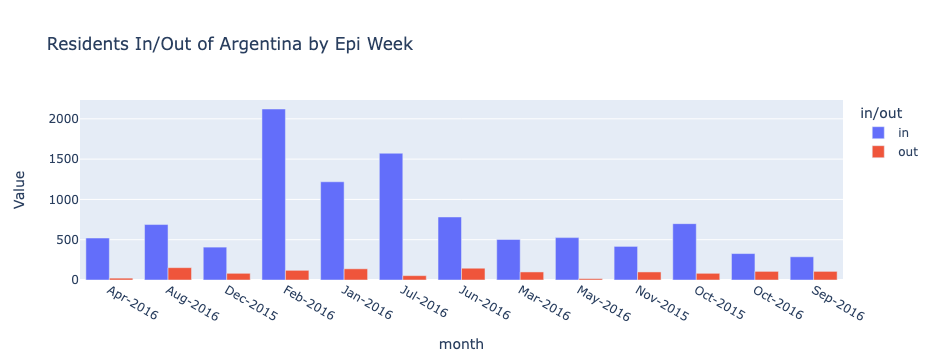

In [125]:
# now viewing where the users were RESIDENTS ONLY by month

df5 = df[df['resident/visitor'] == "resident"]

df5 = df5[["month", "in/out"]].sort_values(by="month")
df5 = df5.value_counts(dropna=False)
df5 = df5.reset_index().rename({0: "Value"}, axis=1)
df5 = df5.sort_values(by="month")

import plotly.express as px

fig = px.bar(df5, x="month", y="Value", color="in/out", title="Residents In/Out of Argentina by Month", barmode="group")
fig.show()

### Visitors In/Out of Argentina

In [122]:
# now viewing where the users were VISITORS ONLY by week

df4 = df[df['resident/visitor'] == "visitor"]

df4 = df4[["epi_week", "in/out"]].sort_values(by="epi_week")
df4 = df4.value_counts(dropna=False)
df4 = df4.reset_index().rename({0: "Value"}, axis=1)
df4 = df4.sort_values(by="epi_week")
df4

,epi_week,in/out,Value
39,201539,out,2882
100,201539,in,179
1,201540,out,7539
75,201540,in,336
0,201541,out,7903
...,...,...,...
109,201642,in,141
101,201643,in,171
47,201643,out,2650
58,201644,out,646


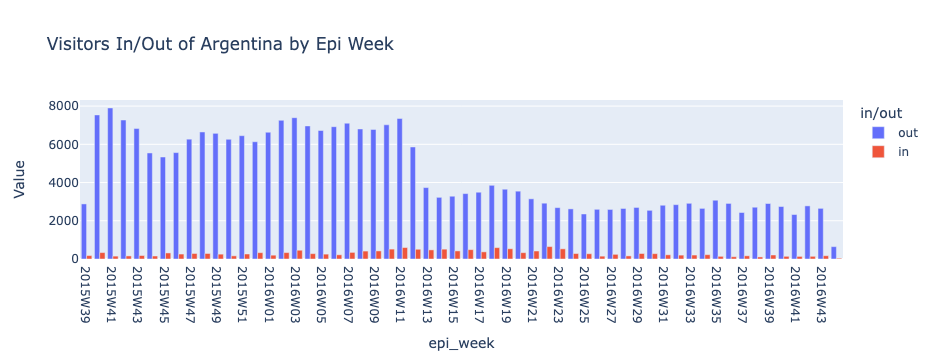

In [123]:
import plotly.express as px

fig = px.bar(df4, x="epi_week", y="Value", color="in/out", title="Visitors In/Out of Argentina by Epi Week", barmode="group")
fig.show()

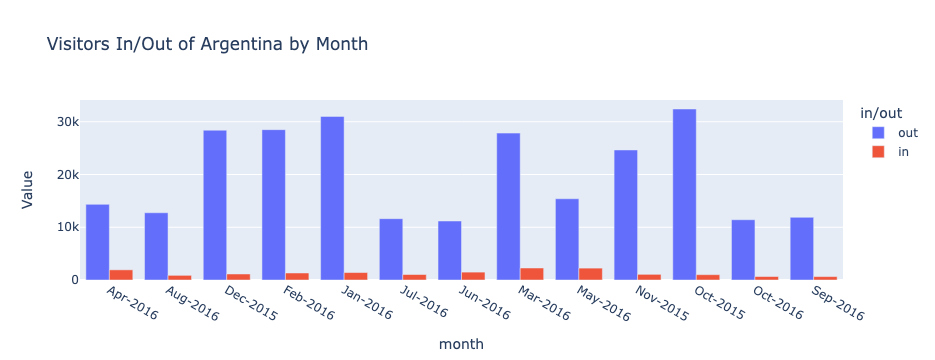

In [126]:
# now viewing where the users were VISITORS ONLY by month

df6 = df[df['resident/visitor'] == "visitor"]

df6 = df6[["month", "in/out"]].sort_values(by="month")
df6 = df6.value_counts(dropna=False)
df6 = df6.reset_index().rename({0: "Value"}, axis=1)
df6 = df6.sort_values(by="month")

import plotly.express as px

fig = px.bar(df6, x="month", y="Value", color="in/out", title="Visitors In/Out of Argentina by Month", barmode="group")
fig.show()

### If someone was out of the country, when?

In [164]:
# RESIDENTS

df7 = df.reset_index(drop=True)

df7 = df7[["username", "month", "in/out"]].sort_values(by="month")
df7 = df7.value_counts(dropna=False)
df7 = df7.reset_index().rename({0: "Value"}, axis=1)
df7 = df7.sort_values(by="username")
df7

,username,month,in/out,Value
1981,22Carocaro,Mar-2016,out,3
2364,22Carocaro,Oct-2016,out,1
2273,22Carocaro,Jun-2016,in,1
2138,22Carocaro,Nov-2015,out,2
2115,22Carocaro,May-2016,out,2
...,...,...,...,...
1213,zayrix29,Feb-2016,out,11
950,zayrix29,Apr-2016,out,17
1247,zayrix29,Mar-2016,out,10
1554,zayrix29,Aug-2016,out,6




  0%|          | 0/56 [00:00<?, ?it/s]

100%|██████████| 56/56 [00:00<00:00, 480.80it/s]

trace 1 added
added menu


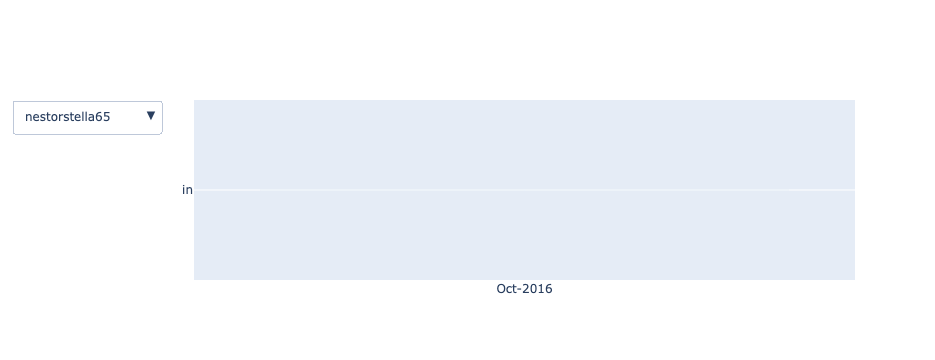

In [153]:
# incomplete, supposed to show for each use by month the proportion of tweets in/out of Argentina

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import datetime
import tqdm

df_ = df7

# # plotly
fig = go.Figure()

# set up ONE trace
fig.add_trace(go.Bar(x=df_[df_.username == df_.username[0]].month,
                         y=df_[df_.username == df_.username[0]]["in/out"],
                         visible=True)
             )
print("trace 1 added")

updatemenu = []
buttons = []

# button with one option for each dataframe
for username in tqdm.tqdm(df_.username.unique()):
    buttons.append(dict(method='restyle',
                        label=username,
                        visible=True,
                        args=[{'y':[df_[df_.username == username]["in/out"]],
                               'x':[df_[df_.username == username].month],
                               'type':'bar'}, [0]],
                        )
                  )

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

print("added menu")

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

In [172]:
len(usernames)

238

# Meeting Week 9 Notes

## --------------------------
## Too Little Twitter Data

Only about 289,901 of collected 7x10^6 tweets from Argentina are geotagged and the user has tweeted from Argentina. This corresponds to about 238 users for the whole of 2016, which is far too few.

Proposed solutions:
1. Collect a set of usernames that only Argentinians would @mention in tweets (e.g. politicians, local services, local news organisations, local ministries of health). Collect all tweets that mention these and filter to get residents.
2. Collect all tweets in Spanish in a given time period. See how many are from Argentina. Collect all usernames of people who have ever been in Argentina. Identify residents/visitors from there.

## --------------------------
## Who is a resident?

1. Dr Rachel Sippy sent me an article about how residents are identified. In short, the country of residence is where the person tweets most frequently out of.

2. Use NER to see if my residency status matches what NER outputs. (Seeing if this is viable option)

## --------------------------
## Next Meeting

Rachel Sippy:
- Come up with hypothesis tests we could use
- Figure out what format we need the data in

Myself:
- Test NER's efficacy
- Collect all tweets in Spanish from 2016 (specific time period)
- Clean up GitHub repo so it's more representative of current efforts and progress

In [ ]:
df[df['resident/visitor'] == "resident"]